<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/9.4_Segmentation_Otsu_Eq10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **9.4 Google Colab con algoritmo OTSU**

**Equipo 10:**

* Carlos Roberto Torres Ferguson A01215432
* Andrea Carolina Treviño Garza A01034993
* Julio Adrián Quintana Gracia A01793661
* Pablo Alejandro Colunga Vázquez A01793671

# 6. Otsu Thresholding

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [72]:
import matplotlib.pyplot as plt
from skimage import data, io
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

## Single Thresholding <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2] calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

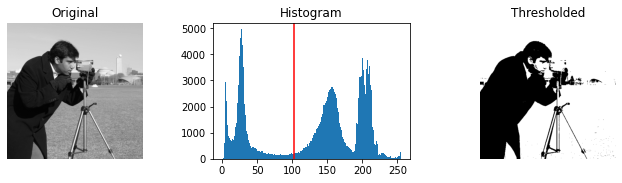

In [2]:
#Código original
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(12, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




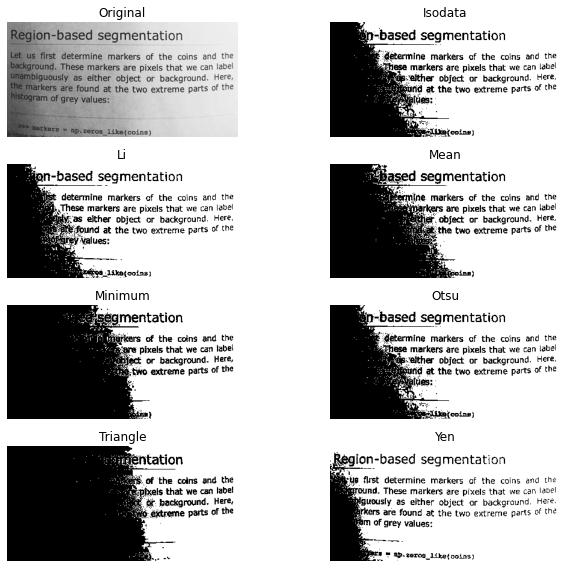

In [3]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

# **Ejercicio**
* Experimenta con diferentes imagenes ademas de las provistas en en Colab, identifca imagenes con diferentes backgrounds y estilos, cuales son las limitaciones de single thresholding contra el algoritmo de Otsu

Intentamos Single Thresholding de la base de imágenes "data" de skimage con las siguientes imágenes. De cada uno concluimos:
* data.clock()# no es buena imagen
* data.horse() - imagen no ejecuta debido al tamaño
* data.astronaut() - imagen muy grande
* data.moon() # no es buena imagen
* data.rocket() #  imagen no ejecuta debido al tamaño
* data.text() # buena imagen
* data.checkerboard() # buena imagen
* data.coins() # buena imagen

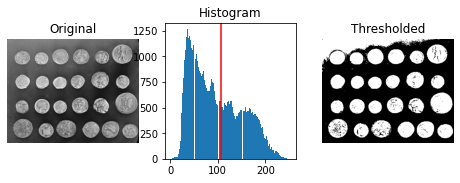

In [4]:
image = data.coins() # buena imagen

thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

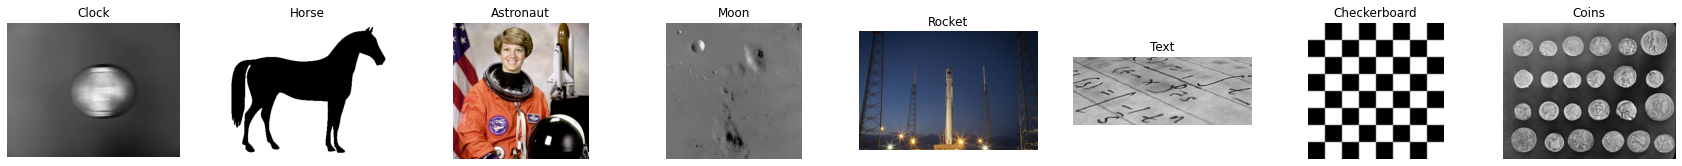

In [88]:
img1 = data.clock()
img2 = data.horse() 
img3 = data.astronaut() 
img4 = data.moon()
img5 = data.rocket() 
img6 = data.text() 
img7 = data.checkerboard() 
img8 = data.coins() 

listIMG = [img1, img2, img3, img4, img5, img6, img7, img8]
listTIT = ["Clock", "Horse", "Astronaut", "Moon", "Rocket", "Text", "Checkerboard", "Coins"]
fig, axes = plt.subplots(ncols=8, figsize=(30, 2.5))
ax = axes.ravel()

for y in range(0,7):
  ax[y] = plt.subplot(1, 8, y+1)
ax[7] = plt.subplot(1, 8, 8, sharex=ax[0], sharey=ax[0])

for i in range(0,8):
  ax[i].imshow(listIMG[i], cmap=plt.cm.gray)
  ax[i].set_title(listTIT[i])
  ax[i].axis('off')
plt.show()

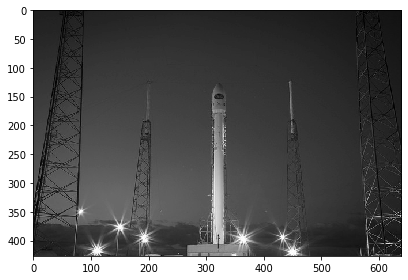

In [82]:
gray5 = rgb2gray(img5)
io.imshow(gray5)

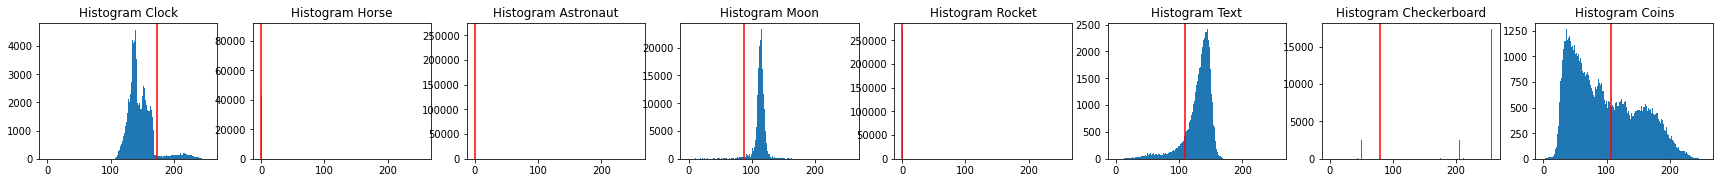

In [90]:
from skimage.color import rgb2gray
gray3 = rgb2gray(img3)
gray5 = rgb2gray(img5)

listGray1 = [img1.ravel(), img2.ravel(), gray3.ravel(), img4.ravel(), gray5.ravel(), img6.ravel(), img7.ravel(), img8.ravel()]
fig, axes = plt.subplots(1,8, figsize=(30, 2.5))
ax = axes.ravel()
for i, ax1 in enumerate(ax):
  ax1.hist(listGray1[i], bins=256, range = [0,256])
  ax1.set_title('Histogram '+str(listTIT[i])) 
  thresh = threshold_otsu(listGray1[i])
  ax1.axvline(thresh, color='r')
plt.show()

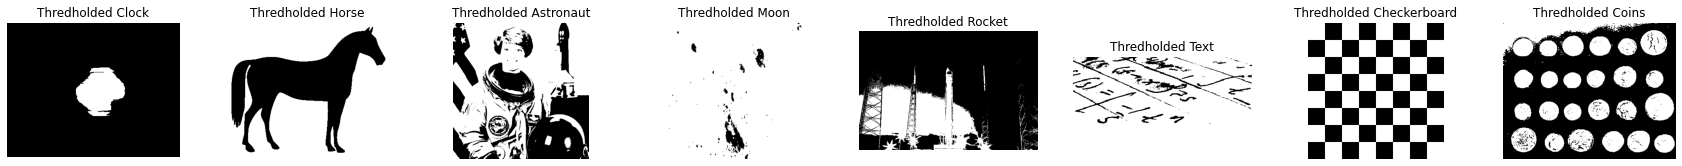

In [91]:
from skimage.color import rgb2gray
gray3 = rgb2gray(img3)
gray5 = rgb2gray(img5)

listGray = [img1, img2, gray3, img4, gray5, img6, img7, img8]
fig, axes = plt.subplots(ncols=8, figsize=(30, 2.5))
ax = axes.ravel()

for y in range(0,7):
  ax[y] = plt.subplot(1, 8, y+1)
ax[7] = plt.subplot(1, 8, 8, sharex=ax[0], sharey=ax[0])

for i in range(0,8):
  thresh = threshold_otsu(listGray[i])
  binary = listGray[i] > thresh
  ax[i].imshow(binary, cmap=plt.cm.gray)
  ax[i].set_title('Thredholded '+str(listTIT[i])) 
  ax[i].axis('off')
plt.show()

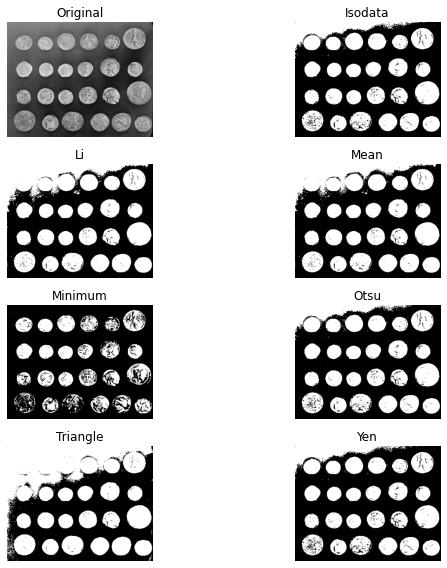

In [5]:
from skimage.filters import try_all_threshold

img = data.coins()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
# TODO: Slide image for segmentation, alpha blerding

##Experimenta con diferentes imagenes

Ejerficio realizado con distintas imágenes, para el ejemplo, dejamos la imagen de unas monedas.

##**Conclusiones**

*En el "single tresholding" el histograma no identifica las 2 entidades principales de busqueda, el objeto principal y el fondo, el treshold no esta dividido no es especifico.

*adicionalmente se deben considerar imagenes en escala de grises como argumento principal


*el ruido no se remueve del todo por lo cual se requiere aplicar filtrados para remover aspectos no reelevantes del background

*se define un umbral, si se encuentran pixeles por debajo de se umbral se fefine como 0 y si son mayores se establecen como 1, es por eso que cuando tenemos un objeto principal e imagenes no consolidadas en el background (fondo) estas imagenes se consideran como parte del obejto principal

*el segundo argumento es definir el umbral 

*El tercer argumento es el valor máximo que se asigna a los valores de píxel que superan el umbral





## Multi Thresholding <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

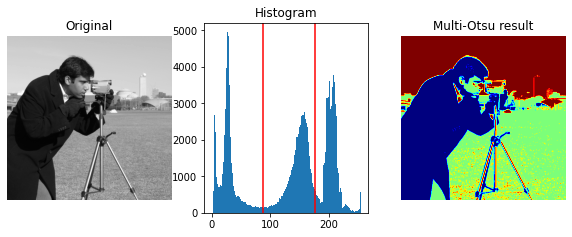

In [ ]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()